In [1]:
#!pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt 
#!pip install -U ipykernel

In [2]:
print("Packages and dependencies in case of dependency hell switch to yml env file and set the package of choice")

Packages and dependencies in case of dependency hell switch to yml env file and set the package of choice


In [3]:
split=True
n_dim = 2 #number of dims in domain 
n_mp = 360 #number of microplanes in interpolation 
n_steps = 100 #solver steps 
#ratio=step of defining actual domain
delta = np.identity(n_dim) #Kronecker δij
epsilon_11=np.linspace(0,0.01,n_steps)#define evenly the lin space from 0 to 0.01 with n_steps
#0.01 optional or otherwise raises DeprecationWarning when num cannot be safely interpreted as an integer
epsilon_ij=np.zeros((len(epsilon_11,),n_dim,n_dim))#creation of the finite 2d space
#epsilon_ijk=np.zeros((len(epsilon_11,),n_dim,n_dim,n_dim))
epsilon_ij[:,0,0]=epsilon_11 #reshape,arrange,apprehend 
#epsilon_ij[:,0,0,0]=epsilon_11


In [4]:
class IntegScheme():
    #n_mp=360
    alpha_list = np.linspace(0,2*np.pi,n_mp)#polar angle dom
    MPN = np.array([[np.cos(alpha),np.sin(alpha)] for alpha in alpha_list ])
    #alpha=float val?
    #weights of each microplane
    #if n_dim==2:
    MPW = np.ones(n_mp) / n_mp * 2
    MPM = np.zeros_like(MPN)
    
    #elif n_dim==3:
     #       MPW = np.ones(n_mp) / n_mp * 6
    #else: 
     #       print("ENTER NUMBER OF DIMS")
    delta= np.identity(n_dim) #should be already set?
    MPNN_nij = np.einsum('ni,nj -> nij', MPN,MPN)
    MPTT_nijr = 0.5*(np.einsum('ni,jr -> nijr',MPN,delta)
                    +np.einsum('nj,ir ->njir',MPN,delta)
                    -2*np.einsum('ni,nj,nr ->nijr',MPN,MPN,MPN))
    #MPTM= np.einsum('nij,)
    #MPTL=MPNN_nij-MPNV
    


In [5]:
#for the creation of m&l we need a 3dlinspace apriori with set e1 to get the projection ?
#normal strain vector for each microplane
e_N = np.einsum('nij,...ij->...n',IntegScheme.MPNN_nij,epsilon_ij)
MPTT_ijr =  IntegScheme.MPTT_nijr 
e_V_norm = np.einsum('...ij,...ij->...',delta, epsilon_ij)/3
e_V = np.einsum('ij,i->ij', np.ones_like(e_N), e_V_norm)
e_D = e_N - e_V
MPN = IntegScheme.MPN
e_T_r=np.einsum('nija,...ij->...na',MPTT_ijr,epsilon_ij)
#e_V=np.identity(len())
#e_D=e_N -e_V

In [9]:
%matplotlib widget
cm = 1 / 2.54  # centimeters in inches
plt.figure(figsize=(20*cm, 10*cm))
rads = np.arange(0, (2 * np.pi), (2 * np.pi) / n_mp)
plt.subplot(131, projection='polar')#subplot like matlab sets a matrix of plots but without setting ann array just the xyp where p position 
#plt.subplot(131 , projection='polar')
plt.plot(rads, e_V[-1, :], 'k')
plt.ylim(-1.5 * np.max(np.abs(e_N)),
                 1.5 * np.max(np.abs(e_N)))
plt.title(r'$ε_V$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.subplot(132, projection='polar')
plt.plot(rads, e_D[-1, :], 'k')
plt.ylim(-1.5 * np.max(np.abs(e_N)),
                 1.5 * np.max(np.abs(e_N)))
plt.title(r'$\varepsilon_D$', fontsize=25)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.subplot(133, projection='polar')
plt.plot(rads, np.linalg.norm(e_T_r[-1, :],axis=-1), 'k')
plt.title(r'$ε_T$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)


plt.tight_layout()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [42]:
e_N

array([[0.    , 0.    , 0.    , 0.    ],
       [0.01  , 0.0025, 0.0025, 0.01  ]])

In [10]:
"""
E_modulus =44800
n_poisson = 0.18
if n_poisson <=-1 and n_poisson>=0.25 : 
    K_ =
    G =
else:
    K_1=
    G_1=0
    K_11 = K_+K_1
    G_11 = G+G_1
    n_pseudopoisson=(3*K_*(1+G/G_1)-2*G)/(6*K_*(1+G/G_1)+2*G)
E_N = E_modulus/(1-2*n_poisson)
E_T = E_N*((1-4*n_poisson)/(1+n_poisson))
E_V= E_modulus/(1-2*n_poisson)
xo=
E_D=5*E/((16+n_poisson)*(2+3*n_poisson))
E_N = K_/3
"""
E_N = 70000 # [MPa]
E_T = 6700
from IPython.display import Latex

In [11]:
tryout =np.array([[1,2],[3,4]])
someproduct=np.einsum('nil,nlj -> nij',delta,tryout) 

ValueError: einstein sum subscripts string contains too many subscripts for operand 0

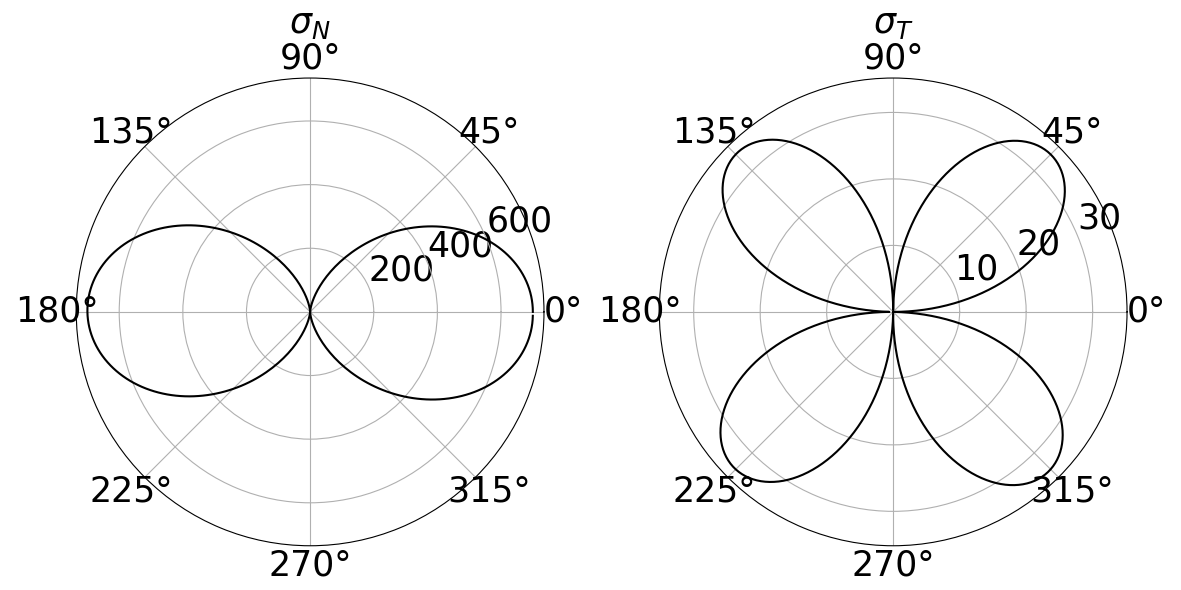

In [16]:
s_N = E_N * e_N
s_V = E_V * e_V
s_D = E_D * e_D
s_T_r = E_T * e_T_r
########SIGMA=V/D twig plot 131 132 133 
%matplotlib widget
cm = 1 / 2.54  # centimeters in inches
plt.figure(figsize=(30*cm, 15*cm))
rads = np.arange(0, (2 * np.pi), (2 * np.pi) / n_mp)
plt.subplot(121, projection='polar')
plt.plot(rads, s_N[-1, :], 'k')
plt.title(r'$\sigma_N$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.subplot(122, projection='polar')
plt.plot(rads, np.linalg.norm(s_T_r[-1, :],axis=-1), 'k')
plt.title(r'$\sigma_T$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)


plt.tight_layout()

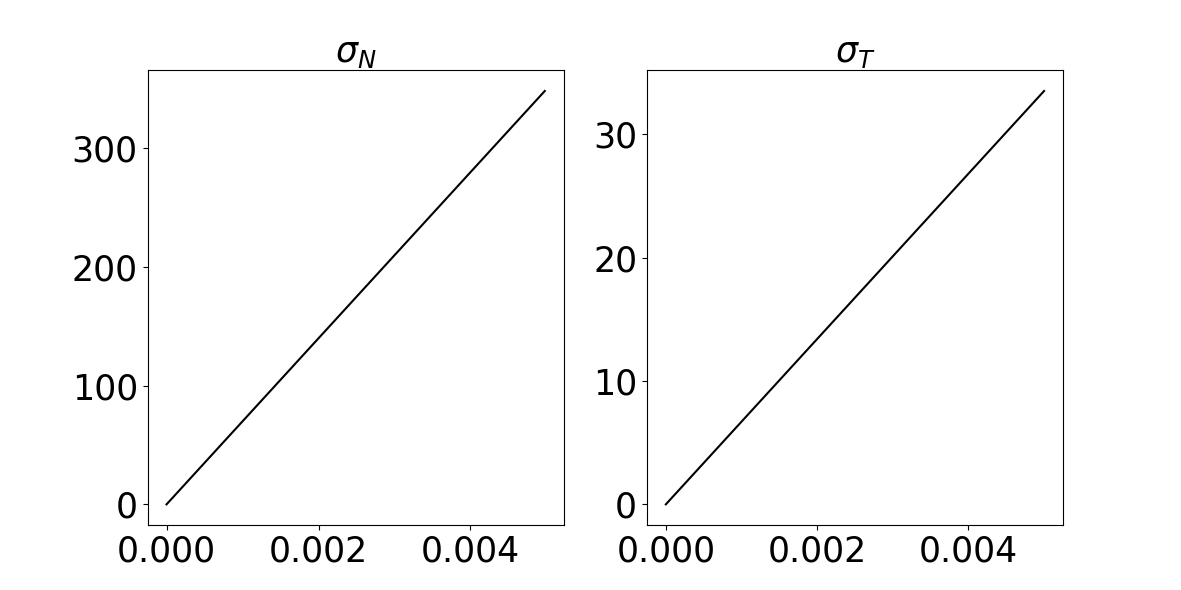

In [17]:
%matplotlib widget
microplane = 45 #46°
cm = 1 / 2.54  # centimeters in inches
plt.figure(figsize=(30*cm, 15*cm))
plt.subplot(121)
plt.plot(e_N[:, microplane], s_N[:, microplane], 'k')
plt.title(r'$\sigma_N$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.subplot(122)
plt.plot(np.linalg.norm(e_T_r[:, microplane],axis=-1), np.linalg.norm(s_T_r[:, microplane],axis=-1), 'k')
plt.title(r'$\sigma_T$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)


In [ ]:
sigma_ij = (
                np.einsum('n,...n,na,nb->...ab',
                          IntegScheme.MPW, s_N, IntegScheme.MPN, IntegScheme.MPN) +
                0.5 * (
                        np.einsum('n,...nf,na,fb->...ab',
                                  IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta) +
                        np.einsum('n,...nf,nb,fa->...ab',
                                  IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta)
                )
        )

#with split 
sigma_ij= (np.einsum('v,....v,ij',s_V,delta)+np.einsum('d,...d,na,nb->...ab',
                          IntegScheme.MPW, s_N, IntegScheme.MPN, IntegScheme.MPN) +
                0.5 * (
                        np.einsum('n,...nf,na,fb->...ab',
                                  IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta) +
                        np.einsum('n,...nf,nb,fa->...ab',
                                  IntegScheme.MPW, s_T_r, IntegScheme.MPN, delta)
                )
        )


In [18]:
class IntegScheme():
    #n_mp=360
    alpha_list = np.linspace(0,2*np.pi,n_mp)#polar angle dom
    MPN = np.array([[np.cos(alpha),np.sin(alpha)] for alpha in alpha_list ])
    #alpha=float val?
    #weights of each microplane
    #if n_dim==2:
    MPW = np.ones(n_mp) / n_mp * 2
    #elif n_dim==3:
     #       MPW = np.ones(n_mp) / n_mp * 6
    #else: 
     #       print("ENTER NUMBER OF DIMS")
    delta= np.identity(n_dim) #should be already set?
    MPNN_nij = np.einsum('ni,nj -> nij', MPN,MPN)
    MPTT_nijr = 0.5*(np.einsum('ni,jr -> nijr',MPN,delta)
                    +np.einsum('nj,ir ->njir',MPN,delta)
                    -2*np.einsum('ni,nj,nr ->nijr',MPN,MPN,MPN))
    MPNV= np.diag(MPN)
    MPND=MPNN_nij-MPNV
    


In [ ]:
#ALG0
k_1=#παρονομαστης κ εκθετικος παρονομαστης+ * sv bound  
k_4=#adding to a
k_3=#v bound * 
k_5=#just in a 
c_20=#exp in a 
c_21=#lowball val in a 

##########################################################
1
##########################################################
de_v=np.einsum('ij,ij',de_ij)/n_dim
de_ij= np.eye(epsilon_11,n_dim)#for sure wrong just to continue with the script 
de_n=np.einsum('nij,ij,->n',IntegScheme.MPNN_nij,de_ij)
de_m=
de_l=
i=0
###########################################################
2
###########################################################
y
de_v=np.einsum('ij,ij',de_ij)/n_dim
e_V=e_V+de_v
e_elastic=(s_V/E_N)
#principal stresses class!2 and 3d just from a mech book 
###########################################################
3
###########################################################
a=(k_5/(1+min(-s_V,c21)/E_N))*((emin-emax)/k_1)**(c_20)+k_4
s_V_bound=-E*k_1*k_3*np.exp(-e_V/(k1*a))
###########################################################
4
###########################################################
de_d=de_n-de_v
e_D=e_N-e_V
